<a href="https://colab.research.google.com/github/gmvenge/ASDFG/blob/master/Buy_a_lot_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [0]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/gmvenge/BuyAlot_data/master/DS%20-%20case%20study%201%20-%20add%20material%20-%20sales_volumes.csv')


In [35]:
sales_df.head()

,Unnamed: 0,InvoiceID,ProductCode,Description,Volume,Date,UnitPrice
0,42481,539993,22386,JUMBO BAG PINK POLKADOT,29,2019-01-04 10:00:00,31.20
1,42482,539993,21499,BLUE POLKADOT WRAP,74,2019-01-04 10:00:00,6.72
2,42483,539993,21498,RED RETROSPOT WRAP,74,2019-01-04 10:00:00,6.72
3,42484,539993,22379,RECYCLING BAG RETROSPOT,14,2019-01-04 10:00:00,33.60
4,42485,539993,20718,RED RETROSPOT SHOPPER BAG,29,2019-01-04 10:00:00,20.00


In [36]:
sales_df.shape

(203422, 7)

In [37]:
sales_df.columns

Index(['Unnamed: 0', 'InvoiceID', 'ProductCode', 'Description', 'Volume',
       'Date', 'UnitPrice'],
      dtype='object')

Converting date from timestamp

In [0]:
sales_df['Sales_Date'] = pd.to_datetime(sales_df['Date'] ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime("%Y-%m-%d")


In [39]:
# Checking Null values in Train Set
sales_df.isnull().sum()

Unnamed: 0       0
InvoiceID        0
ProductCode      0
Description    799
Volume           0
Date             0
UnitPrice        0
Sales_Date       0
dtype: int64

Delete timestamp because its replaced by date

In [0]:
del sales_df ['Date']

Delete Description beacuse it has missing values and is not a useful

In [0]:
del sales_df ['Description']

In [42]:
sales_df.head()

,Unnamed: 0,InvoiceID,ProductCode,Volume,UnitPrice,Sales_Date
0,42481,539993,22386,29,31.20,2019-01-04
1,42482,539993,21499,74,6.72,2019-01-04
2,42483,539993,21498,74,6.72,2019-01-04
3,42484,539993,22379,14,33.60,2019-01-04
4,42485,539993,20718,29,20.00,2019-01-04


Splitting data into train and Test using Pandas and Numpy

In [0]:

sales_df['split'] = np.random.randn(sales_df.shape[0], 1)

msk = np.random.rand(len(sales_df)) <= 0.7

train = sales_df[msk]
test = sales_df[~msk]

In [44]:
len(train)

142348

In [45]:
len(test)

61074

In [46]:
# Checking Null values in Train Set
train.isnull().sum()

Unnamed: 0     0
InvoiceID      0
ProductCode    0
Volume         0
UnitPrice      0
Sales_Date     0
split          0
dtype: int64

In [47]:
train.head()

,Unnamed: 0,InvoiceID,ProductCode,Volume,UnitPrice,Sales_Date,split
0,42481,539993,22386,29,31.20,2019-01-04,0.241832
1,42482,539993,21499,74,6.72,2019-01-04,0.295734
3,42484,539993,22379,14,33.60,2019-01-04,1.116073
4,42485,539993,20718,29,20.00,2019-01-04,0.119598
5,42486,539993,85099B,29,31.20,2019-01-04,1.328226


Describing the Data

In [48]:
print(test.columns.values)

['Unnamed: 0' 'InvoiceID' 'ProductCode' 'Volume' 'UnitPrice' 'Sales_Date'
 'split']


In [49]:
test.shape

(61074, 7)

In [50]:
test.groupby('ProductCode').count()['Volume']

ProductCode
10002            16
10080             1
10120             1
10124A            3
10125            23
10133            19
10135            21
11001             4
15034            12
15036            97
15039            14
15044A           23
15044B           16
15044C           16
15044D           12
15056BL          37
15056N           79
15056P           17
15056bl           9
15056n           11
15056p            2
15058A           21
15058B           25
15058C            9
15060B           18
16008             6
16011             5
16012             7
16014             8
16015             7
               ... 
90214G            6
90214H            4
90214I            2
90214J            9
90214K            5
90214L            8
90214M            2
90214N            2
90214O            1
90214P            3
90214R            2
90214S            3
90214T            3
90214Y            2
90214Z            1
AMAZONFEE         4
BANK CHARGES      6
C2               25
D       

In [51]:
test.groupby('Sales_Date').count()['Volume']

Sales_Date
2019-01-04    363
2019-01-05    547
2019-01-06    554
2019-01-07    561
2019-01-09    314
2019-01-10    578
2019-01-11    438
2019-01-12    548
2019-01-13    427
2019-01-14    433
2019-01-16    196
2019-01-17    776
2019-01-18    424
2019-01-19    435
2019-01-20    439
2019-01-21    494
2019-01-23    242
2019-01-24    427
2019-01-25    522
2019-01-26    382
2019-01-27    491
2019-01-28    283
2019-01-30    211
2019-01-31    447
2019-02-01    452
2019-02-02    437
2019-02-03    317
2019-02-04    375
2019-02-06     91
2019-02-07    375
             ... 
2019-05-26    302
2019-05-27    334
2019-05-29    193
2019-05-31    387
2019-06-01    430
2019-06-02    482
2019-06-03    235
2019-06-05    488
2019-06-06    358
2019-06-07    585
2019-06-08    676
2019-06-09    544
2019-06-10    287
2019-06-12    306
2019-06-13    452
2019-06-14    496
2019-06-15    493
2019-06-16    477
2019-06-17    288
2019-06-19    363
2019-06-20    607
2019-06-21    465
2019-06-22    309
2019-06-23    596

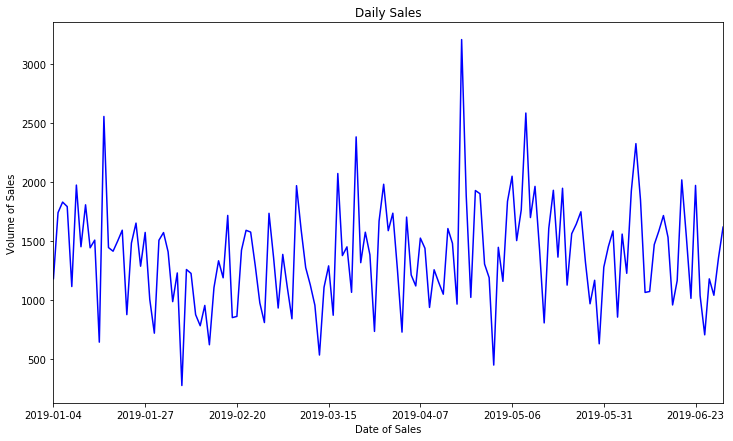

In [52]:
ax = sales_df.groupby('Sales_Date').count()['Volume'].fillna(0).plot( figsize=(12, 7), title='Daily Sales', grid=False, color='blue' )
ax.set_xlabel('Date of Sales') 
ax.set_ylabel('Volume of Sales')
plt.show()

In [53]:
sales_df.groupby(['Sales_Date'])['Volume'].agg(["mean", "max", "min", "std", "count"])

,mean,max,min,std,count
Sales_Date,,,,,
2019-01-04,19.115709,575,-451,48.627982,1184
2019-01-05,30.729776,2159,-2818,123.225344,1743
2019-01-06,35.781114,1799,-604,101.923707,1832
2019-01-07,26.550167,1799,-301,77.367702,1794
2019-01-09,20.972247,575,-7,34.707613,1117
2019-01-10,12.685223,719,-7801,193.686177,1976
2019-01-11,59.026823,9341,-151,406.899392,1454
2019-01-12,15.804312,431,-931,38.787391,1809
2019-01-13,19.997924,863,-124,47.481772,1445


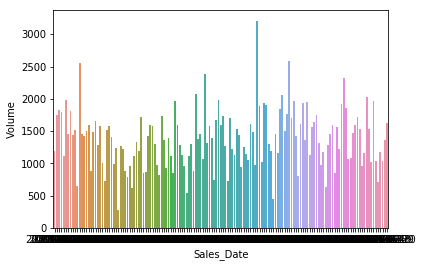

In [54]:
plotdata = sales_df.groupby('Sales_Date')['Volume'].count()
plotdata = pd.DataFrame(plotdata)
plotdata.reset_index(level=0, inplace=True)

sns.barplot(x="Sales_Date", y="Volume", data= plotdata)

In [55]:
expensiveItems = train[sales_df.UnitPrice > np.nanpercentile(sales_df.UnitPrice, 99.8)]
expensiveItems

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,InvoiceID,ProductCode,Volume,UnitPrice,Sales_Date,split
1221,43702,C540117,AMAZONFEE,-4,270208.32,2019-01-05,-0.279574
1222,43703,C540118,AMAZONFEE,-4,263259.36,2019-01-05,-0.472138
1612,44093,540154,DOT,2,3085.76,2019-01-05,-1.613990
2712,45193,540255,DOT,2,3507.84,2019-01-05,0.906858
3028,45509,C540266,M,-4,7332.64,2019-01-06,1.252390
3885,46366,540352,DOT,2,4901.60,2019-01-06,0.308045
5965,48446,540468,DOT,2,4463.52,2019-01-07,-0.208295
8265,50746,540551,DOT,2,8912.00,2019-01-10,-0.894750
8936,51417,540646,DOT,2,4203.68,2019-01-10,-0.463845
9155,51636,540647,22655,2,4720.00,2019-01-10,-1.139975


In [56]:
expensiveItems.groupby(['ProductCode'])['UnitPrice'].agg(["mean", "max", "min", "std", "count"])

,mean,max,min,std,count
ProductCode,,,,,
22502,10392.000000,10392.00,10392.00,0.000000,2
22655,4625.600000,4720.00,4248.00,211.084817,5
22656,4720.000000,4720.00,4720.00,0.000000,3
22826,3120.000000,3120.00,3120.00,0.000000,6
22827,2610.909091,2640.00,2320.00,96.483630,11
22828,2480.000000,2640.00,2320.00,184.752086,4
AMAZONFEE,123259.320000,270208.32,3516.16,94077.014355,8
BANK CHARGES,8369.440000,16802.40,2386.56,6252.063109,4
D,16240.800000,29885.76,2595.84,19296.887490,2


In [0]:
#Adding Features

In [58]:
train['ProductCode'].nunique()

3438

In [59]:
train['revenue'] = train['Volume'] * train['UnitPrice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
plotdata = train.groupby(['ProductCode'])['revenue'].sum()
plotdata = pd.DataFrame(plotdata)
plotdata.reset_index(inplace=True)
plotdata.nlargest(5, 'revenue').merge(train, how = 'left', on = 'ProductCode')

,ProductCode,revenue_x,Unnamed: 0,InvoiceID,Volume,UnitPrice,Sales_Date,split,revenue_y
0,22423,2539181.28,42559,C540006,-4,204.00,2019-01-04,0.744662,-816.00
1,22423,2539181.28,42651,540014,2,204.00,2019-01-04,-0.766116,408.00
2,22423,2539181.28,42817,540022,47,175.20,2019-01-04,1.631962,8234.40
3,22423,2539181.28,43539,540095,5,204.00,2019-01-04,-0.538881,1020.00
4,22423,2539181.28,43935,540154,2,407.84,2019-01-05,0.385683,815.68
5,22423,2539181.28,44212,C540158,-7,175.20,2019-01-05,1.458705,-1226.40
6,22423,2539181.28,44572,540183,47,175.20,2019-01-05,-0.625645,8234.40
7,22423,2539181.28,44826,540239,8,204.00,2019-01-05,-0.769138,1632.00
8,22423,2539181.28,45449,540260,8,204.00,2019-01-06,0.225657,1632.00
9,22423,2539181.28,45920,540316,2,204.00,2019-01-06,-0.977667,408.00


#Machine Learning Model

In [63]:


# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/gmvenge/BuyAlot_data/master/DS%20-%20case%20study%201%20-%20add%20material%20-%20sales_volumes.csv')



#X = dataset.iloc[:, 1:2].values
#y = dataset.iloc[:, 2].values
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[: , 2:3].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""


'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [0]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)




In [0]:
# Predicting the new result for 6.5
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))


In [0]:
# Visualing the SVR result
plt.scatter(X,y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('DailySales (SVR)')
plt.xlabel('SalesDate')
plt.ylabel('Volume')
plt.show()